In [1]:
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
import numpy as np
import scipy.stats as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importing dataset
df = pd.read_csv('Project2_xi\data\kc_house_data.csv')

Exploring the raw data.

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21597, 21)

In [5]:
# Checking for missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# removing variables that aren't useful to the stakeholder problem. Taking out sq_ft above and below as it's included in living
df = df.drop(['id','lat','long','view','sqft_above','sqft_basement','yr_renovated','zipcode','date','waterfront','yr_built'], axis=1)

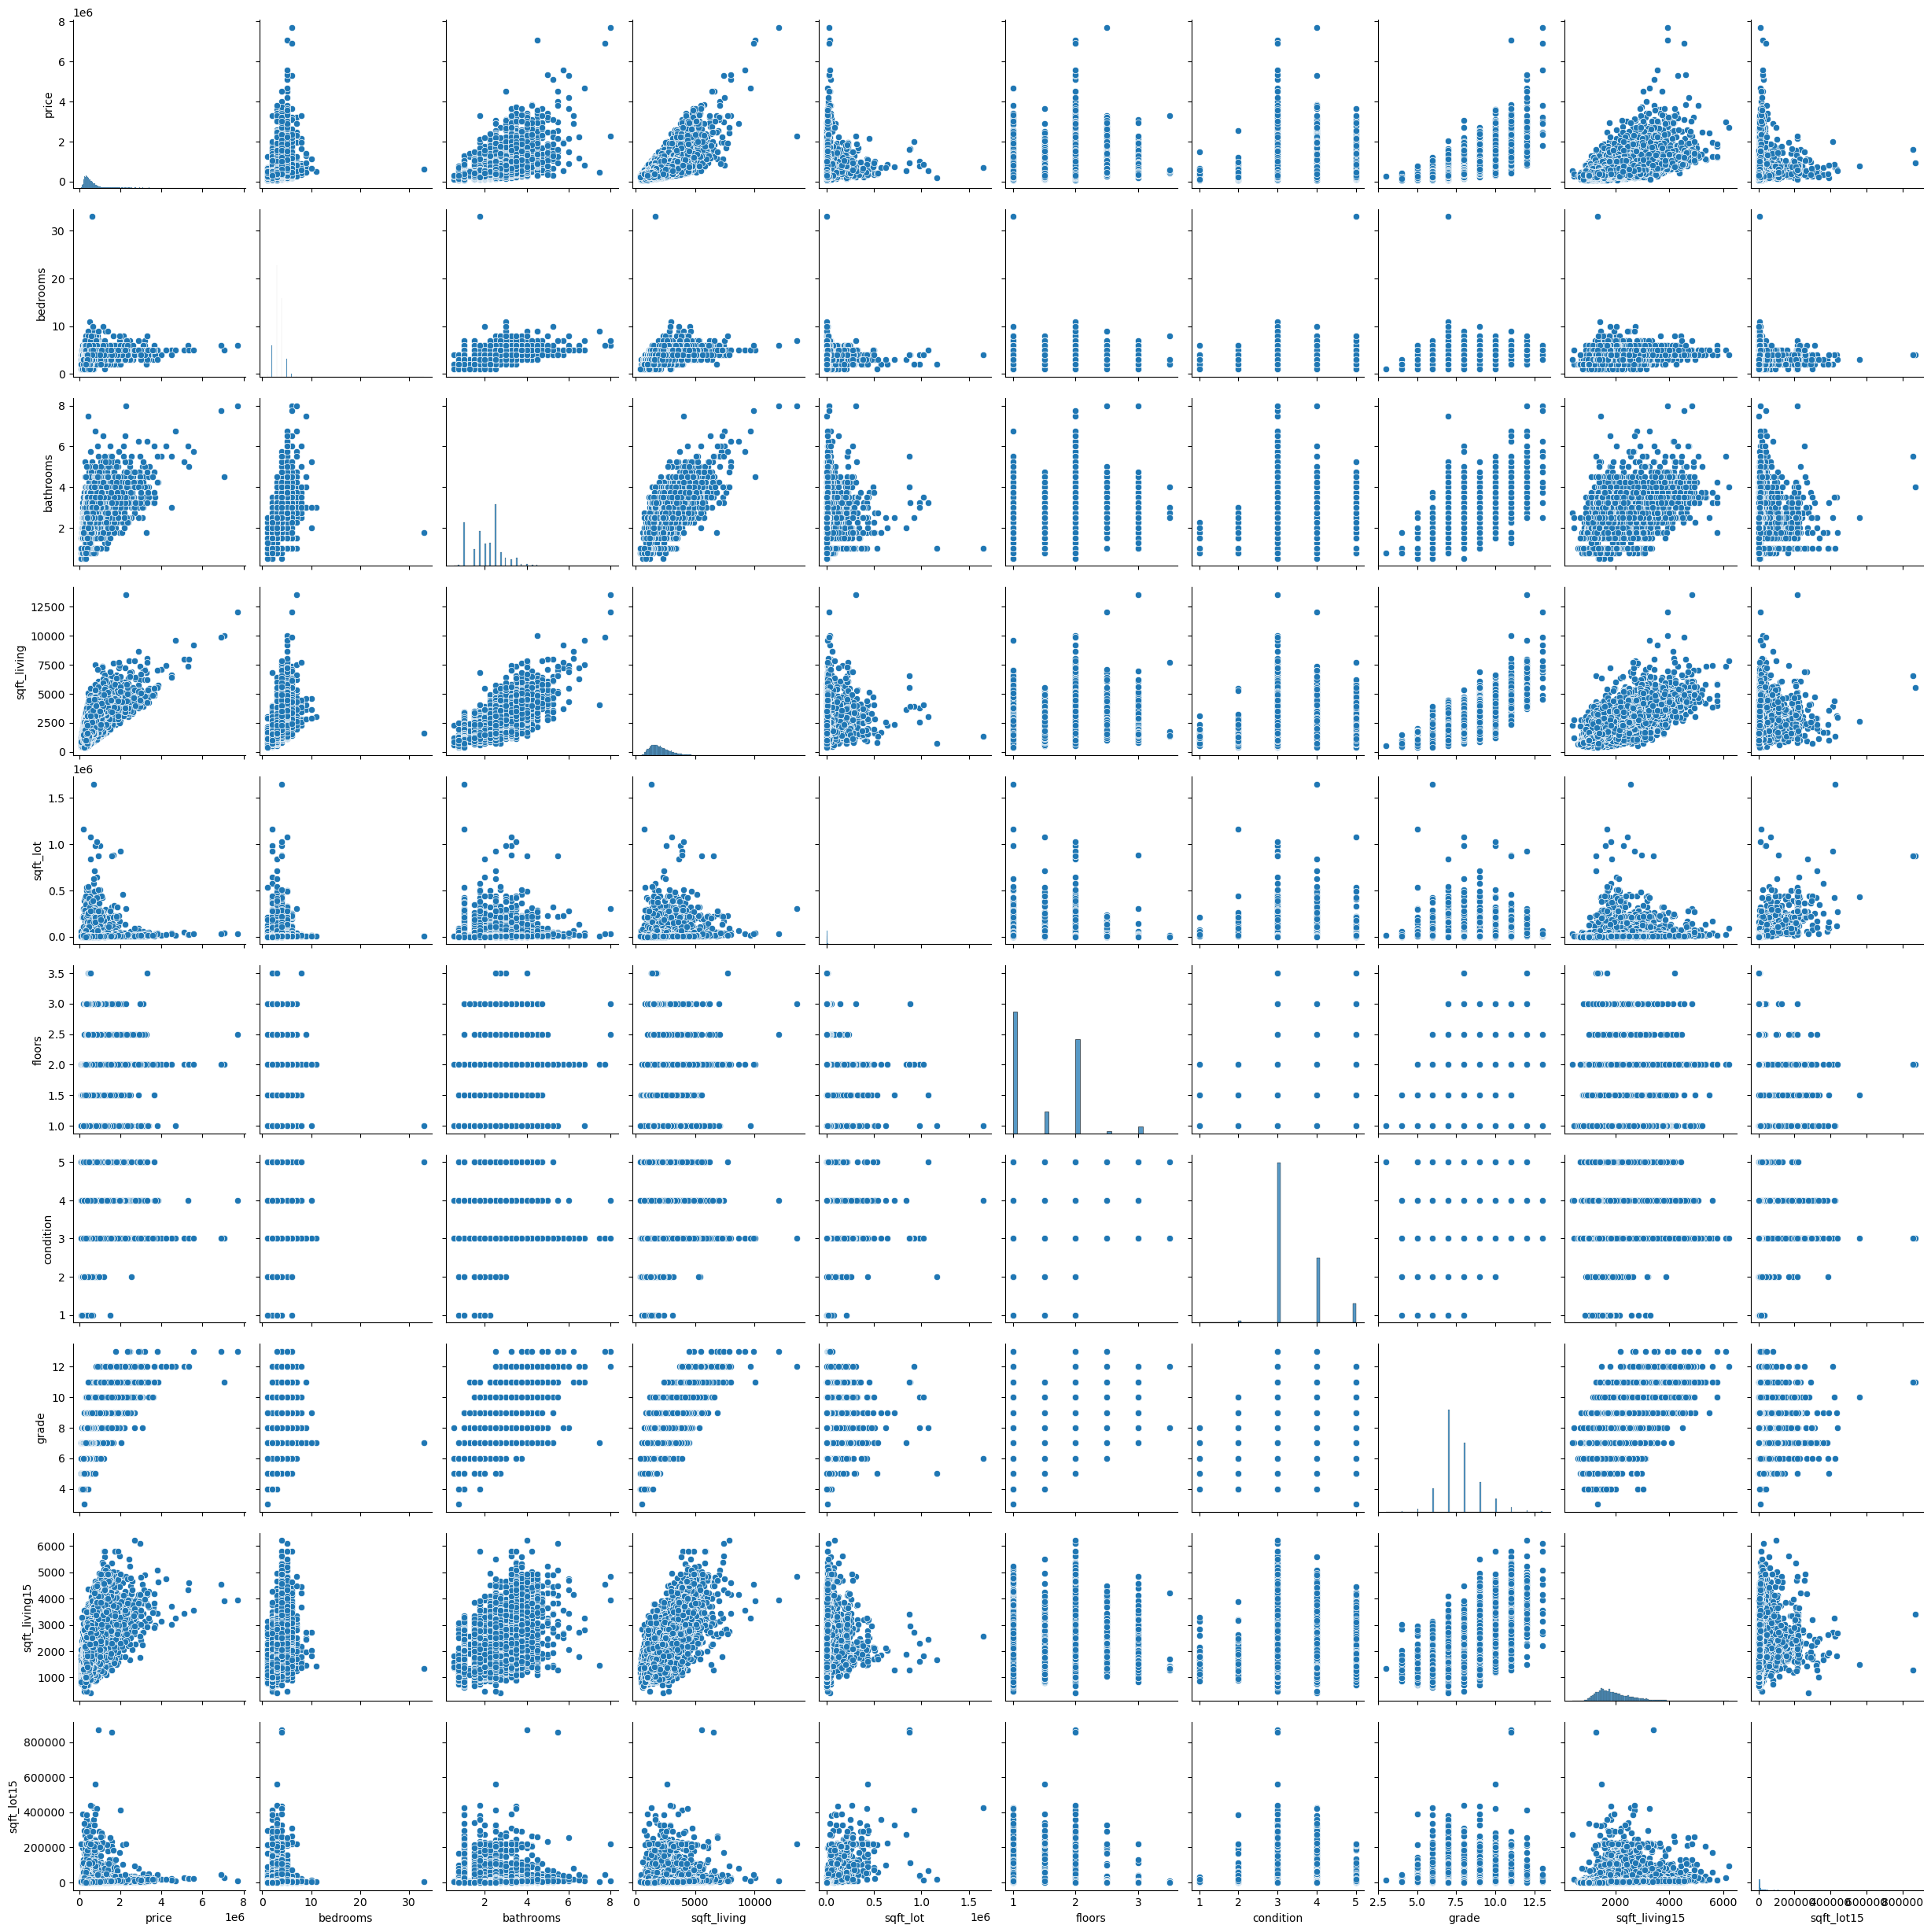

In [8]:
sns.pairplot(df)

# Initial raw analysis have price ~ bathrooms + sqft_living + sqft_living15 have a good correlation

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,6210.000000,871200.000000


C:\Users\61405\AppData\Local\Temp\ipykernel_26560\4054481015.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], ax=axs[0])


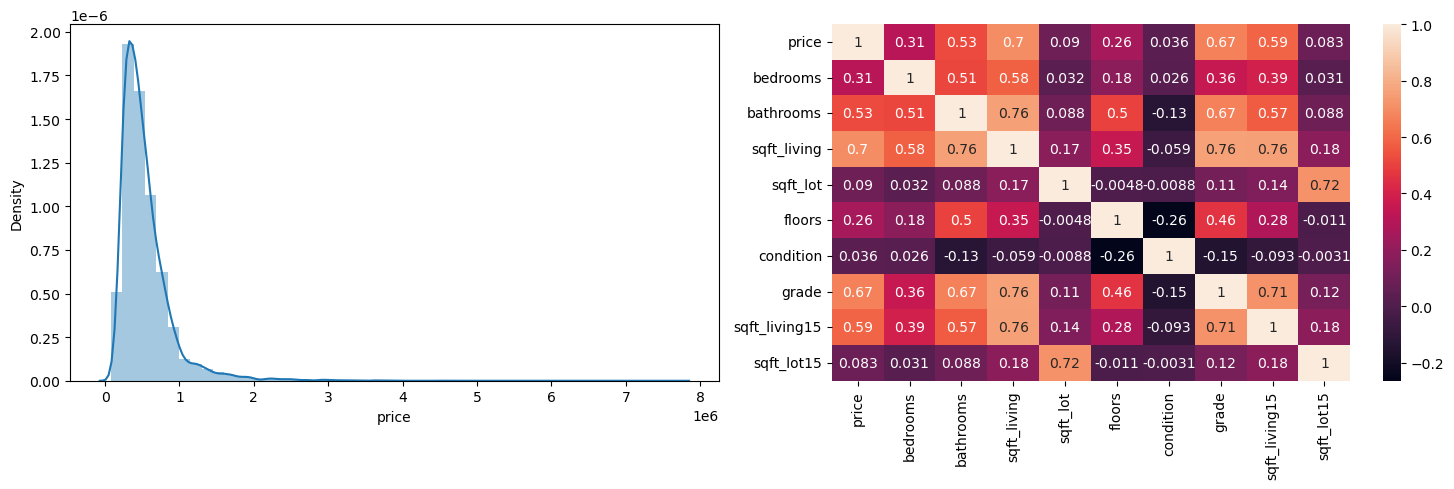

In [14]:
fig, axs = plt.subplots(1,2, figsize=[15,5])
sns.distplot(df['price'], ax=axs[0])
sns.heatmap(df.corr(), ax=axs[1], annot=True)
fig.tight_layout()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [17]:
lm.fit(X_train, y_train) 

LinearRegression()

In [18]:
from statsmodels.regression import linear_model

X_train = sm.add_constant(X_train)
sm_ols = linear_model.OLS(y_train, X_train) 
sm_model = sm_ols.fit()

In [19]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     2179.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:03:44   Log-Likelihood:            -2.0893e+05
No. Observations:               15117   AIC:                         4.179e+05
Df Residuals:                   15107   BIC:                         4.180e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.543e+05    2.2e+04    -34.330      0.000   -7.97e+05   -7.11e+05
sqft_living     210.0012      4.783     43.908      0.000     200.627     219.376
sqft_lot         -0.0025      0.068     -0.036      0.971      -0.136       0.131
bedrooms       -4.78e+04   2820.521    -16.948      0.000   -5.33e+04   -4.23e+04
bathrooms     -5842.5225   4412.609     -1.324      0.186   -1.45e+04    2806.726
floors        -2.344e+04   4506.788     -5.202      0.000   -3.23e+04   -1.46e+04
condition      6.697e+04   3173.612     21.102      0.000    6.07e+04    7.32e+04
grade          1.051e+05   2985.471     35.191      0.000    9.92e+04    1.11e+05
sqft_living15    22.6164      4.746      4.765      0.000      13.313      31.920
sqft_lot15       -0.8719      0.104     -8.393      0.000      -1.075      -0.668
==============================================================================
Omnibus:                    10736.290   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           436484.091
Skew:                           2.937   Prob(JB):                         0.00
Kurtosis:                      28.661   Cond. No.                     5.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

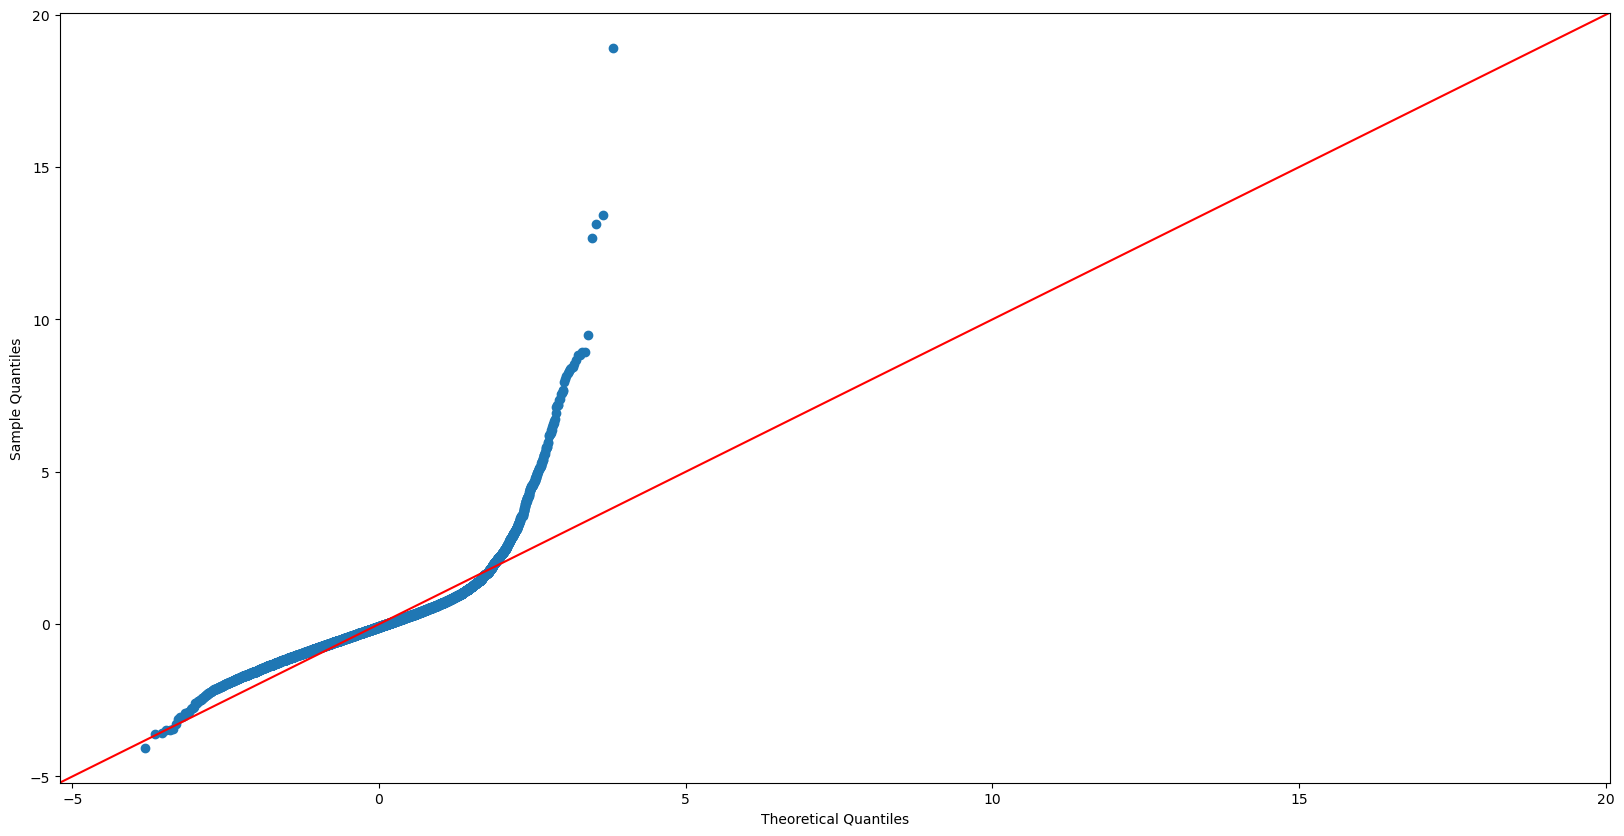

In [20]:
fig = sm.qqplot(sm_model.resid, line='45', fit=True)

In [21]:
df[df.bedrooms>10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_living15,sqft_lot15
8748,520000.0,11,3.00,3000,4960,2.0,3,7,1420,4960
15856,640000.0,33,1.75,1620,6000,1.0,5,7,1330,4700


In [22]:
# Removing data with 33 bedrooms because this outlier looks to be a mistake with not even 2 bathrooms and only 1620sqft living space.
# create a Boolean mask to remove 33 bedrooms
mask = df['bedrooms'] == 33
# select all rows except the ones that contain '33'
df = df[~mask]

In [23]:
df[df.bedrooms>10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_living15,sqft_lot15
8748,520000.0,11,3.0,3000,4960,2.0,3,7,1420,4960


In [24]:
print(df['price'].quantile(0.10))
print(df['price'].quantile(0.90))
print("price Old skew:", df['price'].skew())

245000.0
887000.0
price Old skew: 4.023328880340934


In [25]:
df["price"] = np.where(df["price"] <245000.0, 245000.0,df['price'])
df["price"] = np.where(df["price"] >887000.0, 887000.0,df['price'])
print("price New skew:",df['price'].skew())


price New skew: 0.5730683577569643


C:\Users\61405\AppData\Local\Temp\ipykernel_26560\966627480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = np.where(df["price"] <245000.0, 245000.0,df['price'])
C:\Users\61405\AppData\Local\Temp\ipykernel_26560\966627480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = np.where(df["price"] >887000.0, 887000.0,df['price'])


C:\Users\61405\AppData\Local\Temp\ipykernel_26560\1993057249.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], ax=axs[0], bins = 10)


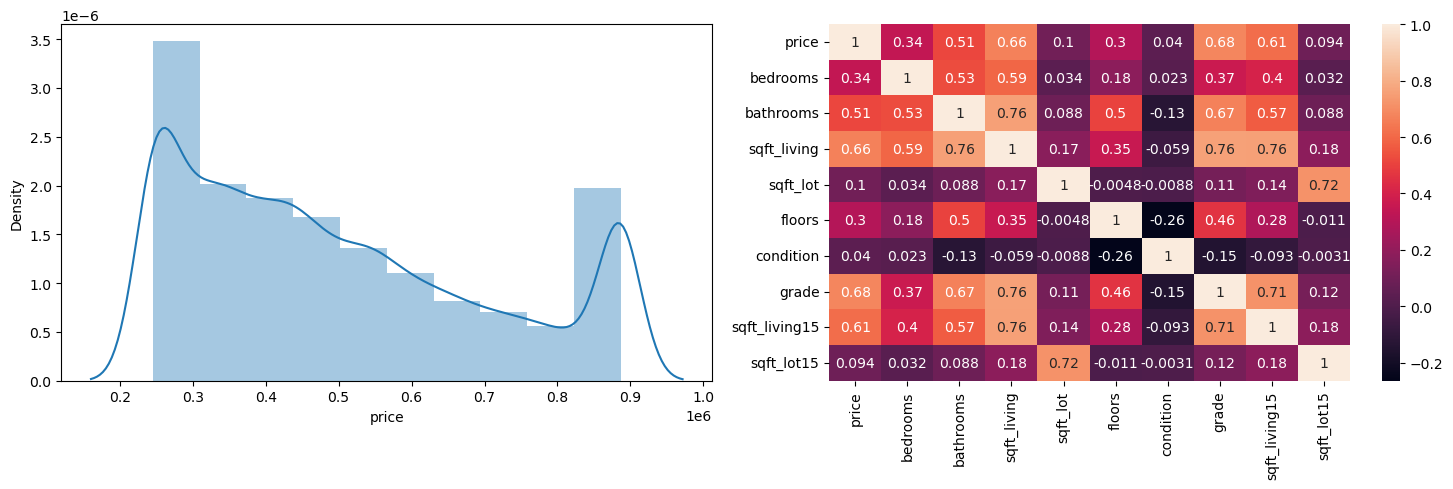

In [26]:
fig, axs = plt.subplots(1,2, figsize=[15,5])
sns.distplot(df['price'], ax=axs[0], bins = 10)
sns.heatmap(df.corr(), ax=axs[1], annot=True)
fig.tight_layout()

In [27]:
# Removing lower correlated variables except bedrooms because bedrooms are important to the desirability of a 
# house even if this data is showing that it has low correlation to price.

df = df.drop(['sqft_lot','floors','condition','sqft_lot15'], axis=1)

In [28]:
df1 = df

In [29]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade',
       'sqft_living15'],
      dtype='object')

In [30]:
X = df1[['bedrooms', 'bathrooms', 'sqft_living','grade', 'sqft_living15']]

y = df1[['price']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
len(X_train)

15117

In [33]:
len(X_test)

6479

In [34]:
X_test.head()

,bedrooms,bathrooms,sqft_living,grade,sqft_living15
3686,3,0.75,850,6,850
10247,3,1.00,1510,6,1510
4037,4,2.25,1790,7,2060
3437,2,1.50,1140,7,1500
19291,3,1.00,1500,7,1640


In [35]:
lm.fit(X_train, y_train) 

LinearRegression()

In [36]:
X_test.head()

,bedrooms,bathrooms,sqft_living,grade,sqft_living15
3686,3,0.75,850,6,850
10247,3,1.00,1510,6,1510
4037,4,2.25,1790,7,2060
3437,2,1.50,1140,7,1500
19291,3,1.00,1500,7,1640


In [37]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21596 non-null  float64
 1   bedrooms       21596 non-null  int64  
 2   bathrooms      21596 non-null  float64
 3   sqft_living    21596 non-null  int64  
 4   grade          21596 non-null  int64  
 5   sqft_living15  21596 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.2 MB


In [39]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade',
       'sqft_living15'],
      dtype='object')

In [40]:
df_scaled = s_scaler.fit_transform(df1[df1.columns])
df_scaled = pd.DataFrame(df_scaled, columns=df1.columns)
df_scaled.head()


,price,bedrooms,bathrooms,sqft_living,grade,sqft_living15
0,-1.221210,-0.411272,-1.451069,-0.980658,-0.560817,-0.943718
1,0.189464,-0.411272,0.174461,0.533337,-0.560817,-0.432930
2,-1.221210,-1.517353,-1.451069,-1.427232,-1.413193,1.070246
3,0.507227,0.694809,1.149778,-0.131078,-0.560817,-0.914530
4,0.054656,-0.411272,-0.150645,-0.436056,0.291559,-0.272397


In [41]:
X_scaled = df_scaled[['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_living15']]

y_scaled = df_scaled[['price']]

In [42]:
Xscaled_train, Xscaled_test, yscaled_train, yscaled_test = \
train_test_split(X_scaled, y_scaled, test_size=0.33)

In [43]:
lm_scaled = LinearRegression()
lm_scaled.fit(Xscaled_train, yscaled_train)

LinearRegression()

In [44]:
lm_scaled.intercept_

array([-0.00358809])

In [45]:
from statsmodels.regression import linear_model

In [46]:
yscaled_train.shape

(14469, 1)

In [47]:
Xscaled_train = sm.add_constant(Xscaled_train)
sm_ols = linear_model.OLS(yscaled_train, Xscaled_train) 
sm_model = sm_ols.fit()


In [48]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     3193.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:03:45   Log-Likelihood:                -15136.
No. Observations:               14469   AIC:                         3.028e+04
Df Residuals:                   14463   BIC:                         3.033e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0036      0.006     -0.626      0.531      -0.015       0.008
bedrooms         -0.0175      0.007     -2.362      0.018      -0.032      -0.003
bathrooms        -0.0511      0.009     -5.574      0.000      -0.069      -0.033
sqft_living       0.3288      0.012     26.519      0.000       0.305       0.353
grade             0.3832      0.010     39.393      0.000       0.364       0.402
sqft_living15     0.1212      0.009     13.056      0.000       0.103       0.139
==============================================================================
Omnibus:                      394.140   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.854
Skew:                           0.421   Prob(JB):                     2.04e-93
Kurtosis:                       3.012   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
yscaled_predicted = lm_scaled.predict(Xscaled_test)
residuals_scaled = yscaled_test - yscaled_predicted

C:\Users\61405\AppData\Local\Temp\ipykernel_26560\1323505765.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_scaled, ax=axs[1][1])


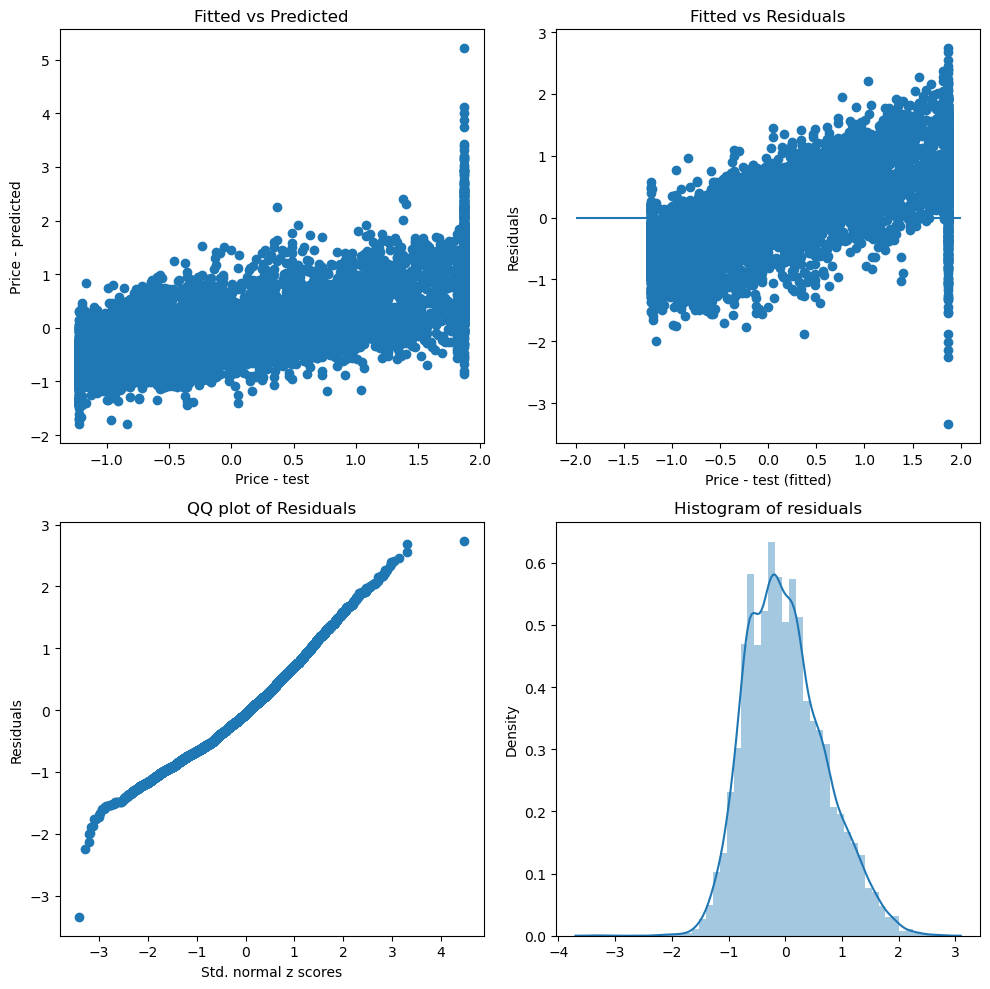

In [50]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
plt.tight_layout()

plt1 = axs[0][0].scatter(x=yscaled_test, y=yscaled_predicted)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('Price - test')
axs[0][0].set_ylabel('Price - predicted')

plt2 = axs[0][1].scatter(x=yscaled_test, y=residuals_scaled)
axs[0][1].hlines(0, xmin=-2, xmax=2)
axs[0][1].set_title('Fitted vs Residuals')
axs[0][1].set_xlabel('Price - test (fitted)')
axs[0][1].set_ylabel('Residuals')

from numpy import random
axs[1][0].scatter(x=sorted(random.randn(len(residuals_scaled))), 
                  y=sorted(residuals_scaled['price']))
axs[1][0].set_title('QQ plot of Residuals')
axs[1][0].set_xlabel('Std. normal z scores')
axs[1][0].set_ylabel('Residuals')

sns.distplot(residuals_scaled, ax=axs[1][1])
axs[1][1].set_title('Histogram of residuals')
plt.tight_layout()

In [51]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15117 6479 15117 6479


In [52]:
df1['sqft_liv_log'] = np.log(df1['sqft_living'])
df1['sqft_liv15_log'] = np.log(df1['sqft_living15'])

In [53]:
df2 = df1.drop(['sqft_living','sqft_living15'], axis=1)
df2.head()

,price,bedrooms,bathrooms,grade,sqft_liv_log,sqft_liv15_log
0,245000.0,3,1.00,7,7.073270,7.200425
1,538000.0,3,2.25,7,7.851661,7.432484
2,245000.0,2,1.00,6,6.646391,7.908387
3,604000.0,4,3.00,7,7.580700,7.215240
4,510000.0,3,2.00,8,7.426549,7.495542


In [54]:
df1['bedrooms'] = df1['bedrooms'].apply(str)
df1['bathrooms'] = df1['bathrooms'].apply(str)
df1['grade'] = df1['grade'].apply(str)

In [55]:
# df1.dtypes

In [56]:
bdr_dummies = pd.get_dummies(df1['bedrooms'], prefix='bdr', drop_first=True)
bth_dummies = pd.get_dummies(df1['bathrooms'], prefix='bth', drop_first=True)
grd_dummies = pd.get_dummies(df1['grade'], prefix='grd', drop_first=True)

In [57]:
df2 = df1.drop(['bedrooms','bathrooms','grade'], axis=1)

In [58]:
df2 = pd.concat([df2, bdr_dummies, bth_dummies, grd_dummies], axis=1)
df2.head()

,price,sqft_living,sqft_living15,sqft_liv_log,sqft_liv15_log,bdr_10,bdr_11,bdr_2,bdr_3,bdr_4,...,grd_11,grd_12,grd_13,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9
0,245000.0,1180,1340,7.073270,7.200425,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,2570,1690,7.851661,7.432484,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,245000.0,770,2720,6.646391,7.908387,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,1960,1360,7.580700,7.215240,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,1680,1800,7.426549,7.495542,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [59]:
df3 = df2.drop(['price'], axis=1)
df3.head()

,sqft_living,sqft_living15,sqft_liv_log,sqft_liv15_log,bdr_10,bdr_11,bdr_2,bdr_3,bdr_4,bdr_5,...,grd_11,grd_12,grd_13,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9
0,1180,1340,7.073270,7.200425,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2570,1690,7.851661,7.432484,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,770,2720,6.646391,7.908387,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1960,1360,7.580700,7.215240,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1680,1800,7.426549,7.495542,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
X1 = df3
y1 = df2[['price']]

In [61]:
X1_train, X1_test, y1_train, y1_test = \
train_test_split(X1, y1, test_size=0.33, random_state=42)

In [62]:
lm1 = LinearRegression()
lm1.fit(X1_train, y1_train)

LinearRegression()

In [63]:
X1_train1 = sm.add_constant(X1_train)
sm_ols2 = linear_model.OLS(y1_train, X1_train1) 
sm_model2 = sm_ols2.fit()

In [64]:
sm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     381.9
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:03:47   Log-Likelihood:            -1.9169e+05
No. Observations:               14469   AIC:                         3.835e+05
Df Residuals:                   14419   BIC:                         3.839e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.862e+05   1.59e+05     -5.577      0.000    -1.2e+06   -5.75e+05
sqft_living       13.3332      7.342      1.816      0.069      -1.059      27.725
sqft_living15      7.7951      9.953      0.783      0.434     -11.715      27.305
sqft_liv_log    1.448e+05   1.55e+04      9.325      0.000    1.14e+05    1.75e+05
sqft_liv15_log  6.239e+04   2.01e+04      3.102      0.002     2.3e+04    1.02e+05
bdr_10          9361.4668   1.01e+05      0.093      0.926   -1.89e+05    2.07e+05
bdr_11         -5.253e+04   1.38e+05     -0.380      0.704   -3.24e+05    2.19e+05
bdr_2          -1.916e+04   1.33e+04     -1.436      0.151   -4.53e+04    6992.706
bdr_3          -7.182e+04   1.35e+04     -5.311      0.000   -9.83e+04   -4.53e+04
bdr_4          -7.367e+04   1.38e+04     -5.322      0.000   -1.01e+05   -4.65e+04
bdr_5          -7.101e+04   1.44e+04     -4.917      0.000   -9.93e+04   -4.27e+04
bdr_6          -4.266e+04   1.75e+04     -2.441      0.015   -7.69e+04   -8402.694
bdr_7          -5.517e+04   2.88e+04     -1.916      0.055   -1.12e+05    1262.429
bdr_8          -1.996e+04    5.1e+04     -0.391      0.696    -1.2e+05       8e+04
bdr_9           1.279e+05   7.08e+04      1.808      0.071   -1.08e+04    2.67e+05
bth_0.75        5.245e+04   8.19e+04      0.640      0.522   -1.08e+05    2.13e+05
bth_1.0         5.728e+04   7.96e+04      0.720      0.472   -9.87e+04    2.13e+05
bth_1.25        1.833e+05   1.12e+05      1.630      0.103   -3.71e+04    4.04e+05
bth_1.5         3.153e+04   7.98e+04      0.395      0.693   -1.25e+05    1.88e+05
bth_1.75        3.821e+04   7.97e+04      0.479      0.632   -1.18e+05    1.94e+05
bth_2.0         4.197e+04   7.97e+04      0.526      0.599   -1.14e+05    1.98e+05
bth_2.25        1.483e+04   7.98e+04      0.186      0.853   -1.42e+05    1.71e+05
bth_2.5        -1.909e+04   7.97e+04     -0.239      0.811   -1.75e+05    1.37e+05
bth_2.75        3.899e+04   7.99e+04      0.488      0.626   -1.18e+05    1.96e+05
bth_3.0         3.695e+04      8e+04      0.462      0.644    -1.2e+05    1.94e+05
bth_3.25        5.884e+04   8.01e+04      0.735      0.462   -9.81e+04    2.16e+05
bth_3.5         4.391e+04      8e+04      0.549      0.583   -1.13e+05    2.01e+05
bth_3.75        6.834e+04    8.1e+04      0.844      0.399   -9.04e+04    2.27e+05
bth_4.0         5.282e+04    8.1e+04      0.652      0.514   -1.06e+05    2.12e+05
bth_4.25        3.476e+04   8.19e+04      0.424      0.671   -1.26e+05    1.95e+05
bth_4.5         2.065e+04   8.15e+04      0.253      0.800   -1.39e+05     1.8e+05
bth_4.75       -6987.9398   8.65e+04     -0.081      0.936   -1.77e+05    1.63e+05
bth_5.0         -1.79e+04   8.88e+04     -0.202      0.840   -1.92e+05    1.56e+05
bth_5.25        1.793e+04   9.29e+04      0.193      0.847   -1.64e+05       2e+05
bth_5.5     

In [65]:
y1_predicted = lm1.predict(X1_test)
residuals1 = y1_test - y1_predicted

C:\Users\61405\AppData\Local\Temp\ipykernel_26560\1950983042.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals1, ax=axs[1][1])


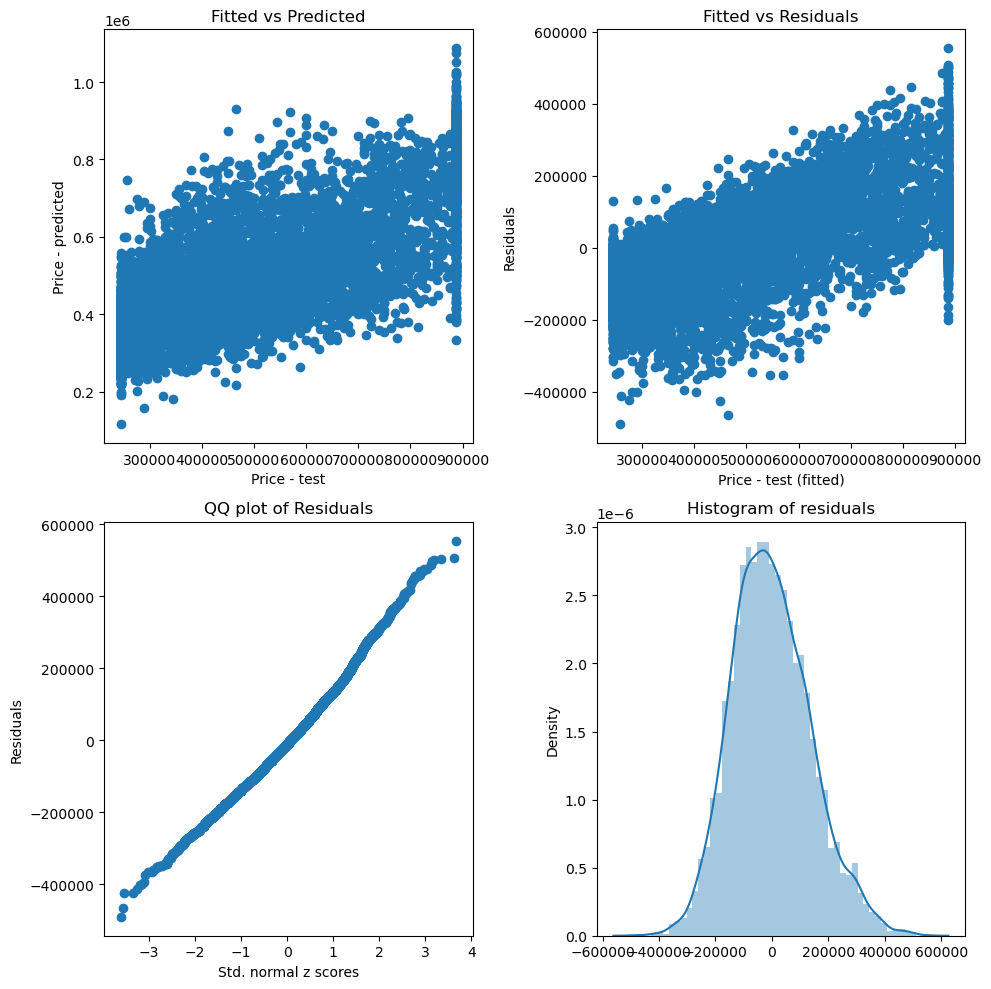

In [66]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
plt.tight_layout()

plt1 = axs[0][0].scatter(x=y1_test, y=y1_predicted)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('Price - test')
axs[0][0].set_ylabel('Price - predicted')

plt2 = axs[0][1].scatter(x=y1_test, y=residuals1)

axs[0][1].set_title('Fitted vs Residuals')
axs[0][1].set_xlabel('Price - test (fitted)')
axs[0][1].set_ylabel('Residuals')

axs[1][0].scatter(x=sorted(random.randn(len(residuals1))), 
                  y=sorted(residuals1['price']))
axs[1][0].set_title('QQ plot of Residuals')
axs[1][0].set_xlabel('Std. normal z scores')
axs[1][0].set_ylabel('Residuals')

sns.distplot(residuals1, ax=axs[1][1])
axs[1][1].set_title('Histogram of residuals')
plt.tight_layout()

In [67]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X1_train, y1_train)

y_hat_train = linreg.predict(X1_train)
y_hat_test = linreg.predict(X1_test)

In [69]:
train_residuals = y_hat_train - y1_train
test_residuals = y_hat_test - y1_test

In [70]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y1_train, y_hat_train)
test_mse = mean_squared_error(y1_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 18831195711.77367
Test Mean Squared Error: 19570975182.845093


In [71]:
18831195711.77367/19570975182.845093

0.9622001732586184

<bold>model is slightly underfitting.<bold>

<h1>Price prediction with log transformed data<h1>

In [73]:
len(y1_predicted)

7127

In [75]:
from sklearn import metrics
metrics.mean_absolute_error(y1_test, y1_predicted)

111447.66350129485

In [76]:
np.sqrt(metrics.mean_squared_error(y1_test, y1_predicted))

139896.30153383288

In [77]:
X1_test['predicted_price'] = y1_predicted

In [91]:
X1_test.head()

,sqft_living,sqft_living15,sqft_liv_log,sqft_liv15_log,bdr_10,bdr_11,bdr_2,bdr_3,bdr_4,bdr_5,...,grd_12,grd_13,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,predicted_price
3686,850,850,6.745236,6.745236,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,218399.638314
10247,1510,1510,7.319865,7.319865,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,356251.848991
4037,1790,2060,7.489971,7.630461,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,414015.269764
3437,1140,1500,7.038784,7.313220,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,387050.290064
19291,1500,1640,7.313220,7.402452,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,411341.300842


<h1>Price prediction with scaled to Std Dev normal distribution data<h1>

In [82]:
KC_fitted = Xscaled_test[Xscaled_test.columns[0:]]
KC_fitted['price'] = yscaled_test
KC_fitted.head()

,bedrooms,bathrooms,sqft_living,grade,sqft_living15,price
6391,-0.411272,-1.451069,-0.904414,-1.413193,-1.165546,-1.221210
6695,0.694809,0.499567,1.110615,1.143935,-0.199427,-0.234460
20406,0.694809,0.499567,0.032302,-0.560817,0.180015,-0.838450
7308,0.694809,-0.800857,-0.033050,-0.560817,-0.053488,-1.124918
11844,-0.411272,-1.451069,-1.296528,-1.413193,-0.578870,-1.221210


In [83]:
KC_fitted_inv = s_scaler.inverse_transform(KC_fitted)
KC_fitted_inv = pd.DataFrame(KC_fitted_inv, 
                                    columns=KC_fitted.columns)
KC_fitted_inv.head().round(3)

,bedrooms,bathrooms,sqft_living,grade,sqft_living15,price
0,413225.813,2.060,1.420,782.889,6.291,1149.858
1,642961.254,3.823,2.970,3130.591,7.424,1825.995
2,642961.254,3.823,2.141,1565.456,7.869,1412.131
3,642961.254,2.648,2.090,1565.456,7.595,1215.839
4,413225.813,2.060,1.119,782.889,6.979,1149.858


In [84]:
yinv_predicted = (yscaled_predicted * s_scaler.scale_[-1]) + s_scaler.mean_[-1]

In [85]:
yinv_predicted.shape

(7127, 1)

In [86]:
KC_fitted_inv['Price predicted'] = yinv_predicted
KC_fitted_inv.head().round(3)

,bedrooms,bathrooms,sqft_living,grade,sqft_living15,price,Price predicted
0,413225.813,2.060,1.420,782.889,6.291,1149.858,1368.285
1,642961.254,3.823,2.970,3130.591,7.424,1825.995,2492.446
2,642961.254,3.823,2.141,1565.456,7.869,1412.131,1833.350
3,642961.254,2.648,2.090,1565.456,7.595,1215.839,1844.779
4,413225.813,2.060,1.119,782.889,6.979,1149.858,1328.652


In [88]:
mse_scaled = metrics.mean_squared_error(KC_fitted_inv['price'], 
                           KC_fitted_inv['Price predicted'])
np.sqrt(mse_scaled)

475.3034160745738

In [89]:
mae_scaled = metrics.mean_absolute_error(KC_fitted_inv['price'], 
                           KC_fitted_inv['Price predicted'])
mae_scaled

380.63536574810183

In [90]:
380/475

0.8